In [44]:
import netCDF4 as nc
import pylab as plt
import numpy as np
from mpl_toolkits.basemap import Basemap, shiftgrid

import matplotlib
import numpy.ma as MA

In [45]:
#constants
mr_ch4 = 16
per_sec_to_per_yr = 60*60*24*360
g_to_Tg = 1e12

## Import data

In [46]:
data_flux = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_ch4+oh.nc')
ch4_oh = data_flux.variables['ch4+oh'][:] #moles per second
lat = data_flux.variables['latitude']

In [34]:
press_xl_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_p.nc')
press_xl = press_xl_data.variables['p']

In [35]:
trop_press_xl_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_troppres.nc')
trop_press_xl = trop_press_xl_data.variables['trop_p']

In [37]:
time = data.variables['time']
dtime = nc.num2date(time[:],time.units)

## Make tropospheric mask

In [13]:
trop_mask_xl = MA.masked_where(press_xl < trop_press_xl[:][:,None,:,:], press_xl) #add extra dimension
#print(press_lbc)

## CH4 OH flux calc

In [27]:
#xltln
ch4_oh_tg_yr = ch4_oh*mr_ch4*per_sec_to_per_yr/g_to_Tg
ch4_oh_trop_xl = MA.masked_where(trop_mask_xl.mask,ch4_oh_tg_yr)
#sum over lat lon alt
flux_sum_xl = np.sum(ch4_oh_trop_xl, axis=(1,2,3))

Text(0.5, 1.0, 'CH4 OH flux over time (xltln)')

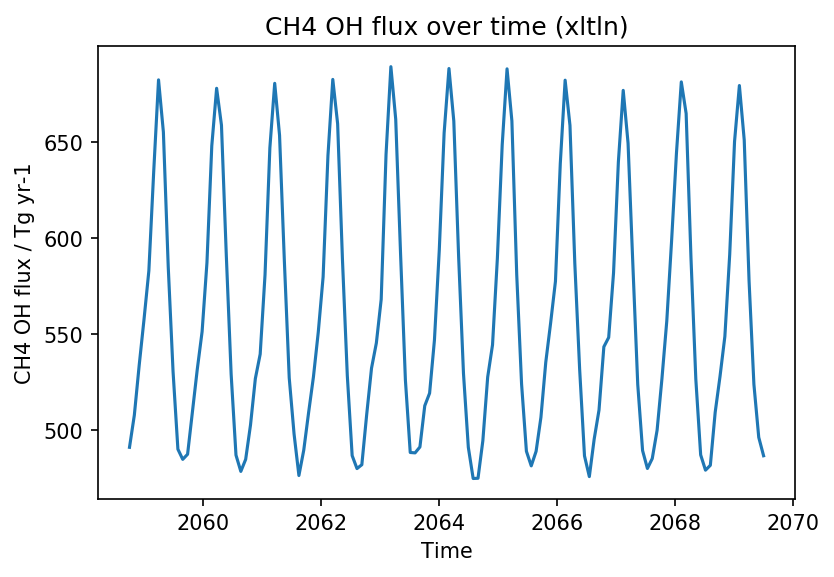

In [29]:
fig = plt.figure(dpi=150)
ax = plt.axes()
ax.plot(dtime,flux_sum_xl)
plt.xlabel('Time')
plt.ylabel('CH4 OH flux / Tg yr-1')
plt.title(f'CH4 OH flux over time (xltln)')